<a href="https://colab.research.google.com/github/elianramon/Challenge_2_TelecomX_CD_ONE/blob/main/TeleconX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOBRE

## **Telecom $X$ - Análise de Evasão de Clientes**
_______

Você foi contratado como assistente de análise de dados na Telecom X e fará parte do projeto "Churn de Clientes". A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.

Seu desafio será coletar, tratar e analisar os dados, utilizando Python e suas principais bibliotecas para extrair insights valiosos. A partir da sua análise, os demais colegas da  equipe de Data Science poderá avançar para modelos preditivos e desenvolver estratégias para reduzir a evasão.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests

## Extração de Dados

In [2]:
# Dados estão no formato JSON

tele_x = pd.read_json("https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json")

tele_x.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### Conversão para df

In [3]:
response = requests.get("https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json")
data = response.json()

df = pd.json_normalize(data)             # "Achata" o JSON para que cada chave vire uma coluna individual

df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Tirando a palavra "costumer"

In [4]:
# Lista de prefixos que você deseja remover
prefixos = ['customer.', 'phone.', 'internet.', 'account.']

# O regex r'|'.join(prefixos) cria o padrão: 'customer\.|phone\.|internet\.|account\.'
# O '\' escapa o ponto para garantir que o pandas entenda como um ponto literal
df.columns = df.columns.str.replace(r'|'.join(prefixos), '', regex=True)

df.head()

,D,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Verificações de Problemas

In [5]:
def caracteristicas (dataset):
    print(f'Tamanho: {dataset.shape}\n')
    print(f'Colunas: {dataset.columns}\n')
    print(f'Informações: {dataset.info()}\n')
    print(f'Descrição: {dataset.describe()}\n')
    print(f'Valores nulos: {dataset.isnull().sum()}')

In [6]:
caracteristicas(df)

Tamanho: (7267, 21)

Colunas: Index(['D', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Charges.Monthly', 'Charges.Total'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   D                 7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines

### Valores Únicos

Como a avaliação anterior não encontrou erros, vamos abordar uma verificação de valores únicos.

In [7]:
# Retorna apenas o número total de valores diferentes
df.nunique()

,0
D,7267
Churn,3
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3


In [8]:
df["Churn"].unique()

array(['No', 'Yes', ''], dtype=object)

In [9]:
df["Churn"].isnull().sum()

np.int64(0)

### Valor Nulo?

# ***Valor vazio é diferente de valor nulo!***

In [10]:
# Substitui as strings vazias por NaN em todo o DataFrame
df.replace('', np.nan, inplace=True)

# Agora, tente rodar o comando novamente:
print(df.isnull().sum())

D                     0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total         0
dtype: int64


Encontramos! Vamos tratar!

In [11]:
# Remove apenas as linhas onde a coluna Churn está vazia

df = df.dropna(subset=['Churn'])

In [36]:
df["Churn"].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [13]:
df.shape

(7043, 21)

As linhas foram removidas com sucesso.

Por fim, fazer um mapeamento na variável $SeniorCitizen$ para padronizar em $No$ e $Yes$

In [14]:
mapeamento = {0: 'No', 1: 'Yes'}

# Aplicamos à coluna
df['SeniorCitizen'] = df['SeniorCitizen'].map(mapeamento)

# Verifique o resultado
print(df['SeniorCitizen'].unique())

['No' 'Yes']


# 📊 Carga e Análise

In [15]:
df.describe()

,tenure,Charges.Monthly
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


## Evasão

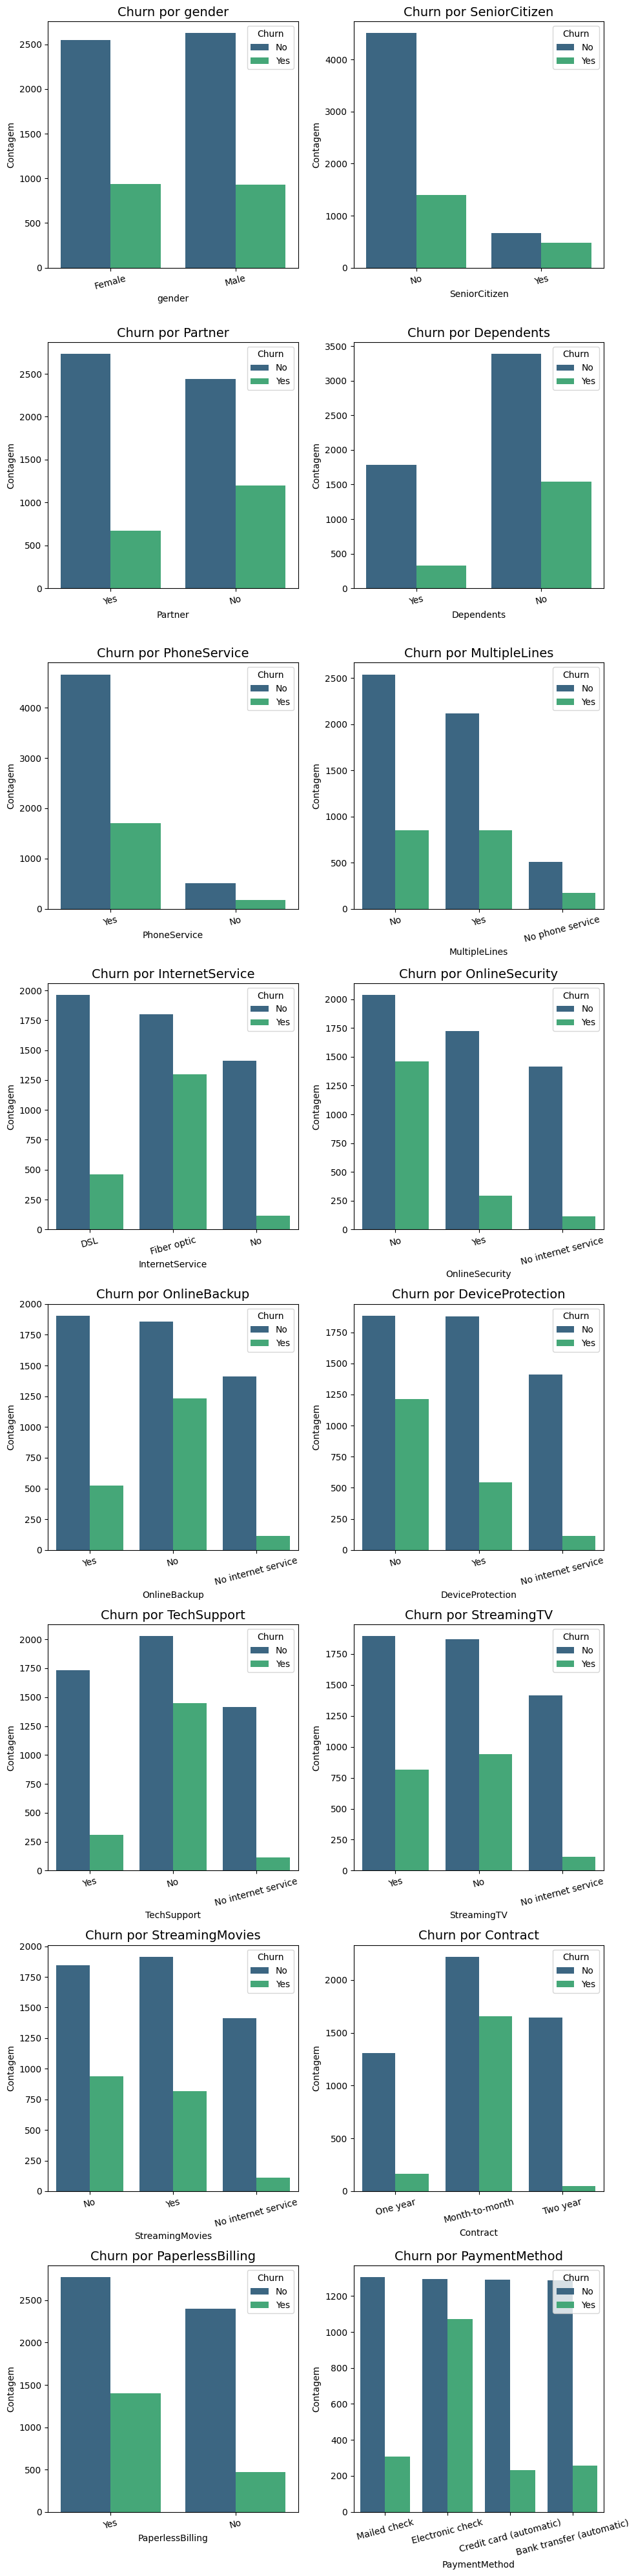

In [34]:
# Filtramos colunas que possuem poucos valores únicos (geralmente as categóricas)
colunas_categoricas = [col for col in df.columns if df[col].nunique() < 10 and col != 'Churn' and col != 'id']

# 2. Configurar o tamanho da grade de gráficos
n_cols = 2
n_rows = (len(colunas_categoricas) + n_cols - 1) // n_cols

plt.figure(figsize=(10, n_rows * 5))

# 3. Loop para criar cada gráfico automaticamente
for i, coluna in enumerate(colunas_categoricas):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=coluna, hue='Churn', palette='viridis')
    plt.title(f'Churn por {coluna}', fontsize=14)
    plt.xlabel(coluna)
    plt.ylabel('Contagem')
    plt.legend(title='Churn', loc='upper right')
    plt.xticks(rotation=15) # Rotaciona os nomes para não sobrepor

plt.tight_layout()
plt.show()

/tmp/ipython-input-2012411422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='Charges.Monthly', palette='magma')


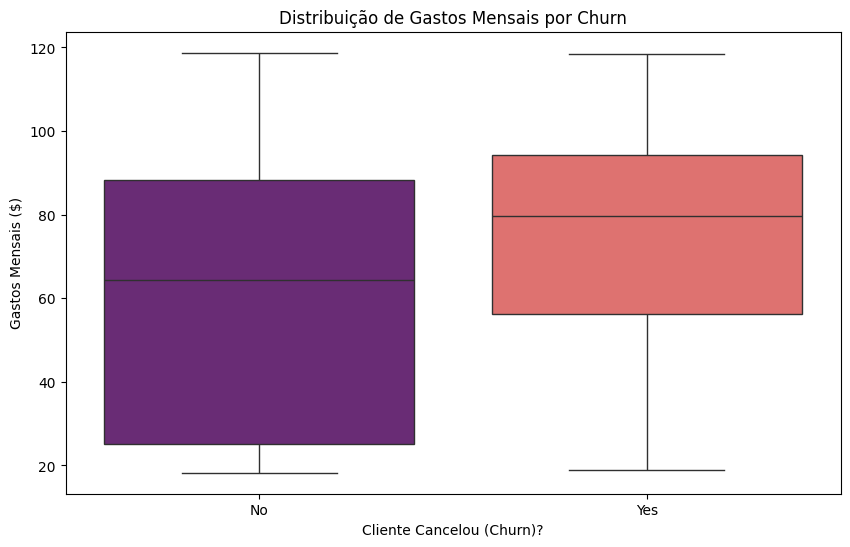

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='Charges.Monthly', palette='magma')

plt.title('Distribuição de Gastos Mensais por Churn')
plt.xlabel('Cliente Cancelou (Churn)?')
plt.ylabel('Gastos Mensais ($)')
plt.show()

Quem mais gasta, desiste com mais facilidade.

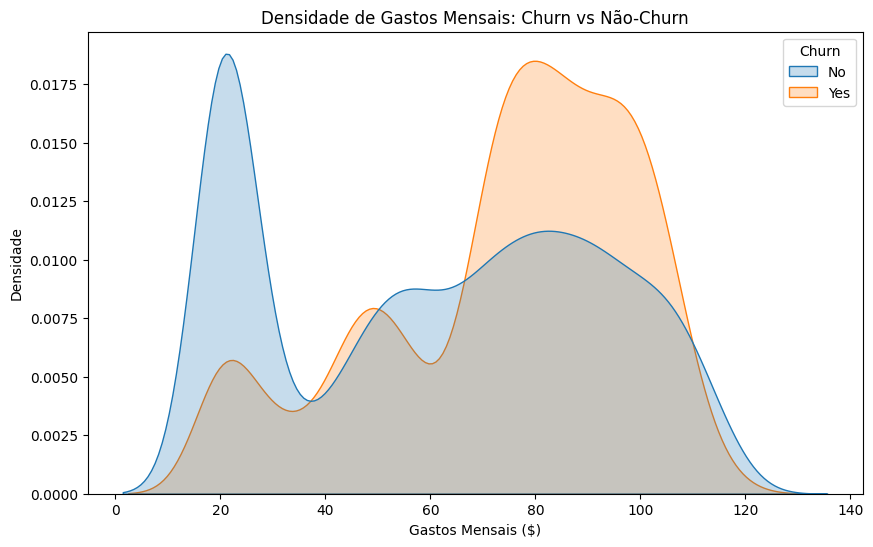

In [30]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Charges.Monthly', hue='Churn', fill=True, common_norm=False)

plt.title('Densidade de Gastos Mensais: Churn vs Não-Churn')
plt.xlabel('Gastos Mensais ($)')
plt.ylabel('Densidade')
plt.show()

A visualização do histograma revela:
___

1. Clientes que pagam pouco no seu plano tendem a permanecer mais tempo.

2. Clientes com contas mais caras têm uma propensão muito maior a cancelar, o que pode indicar carência de benefícios percebidos.

3. O Ponto crítico de perdas de clientes é aproximadamente a partir de $70$ $R{$}$.


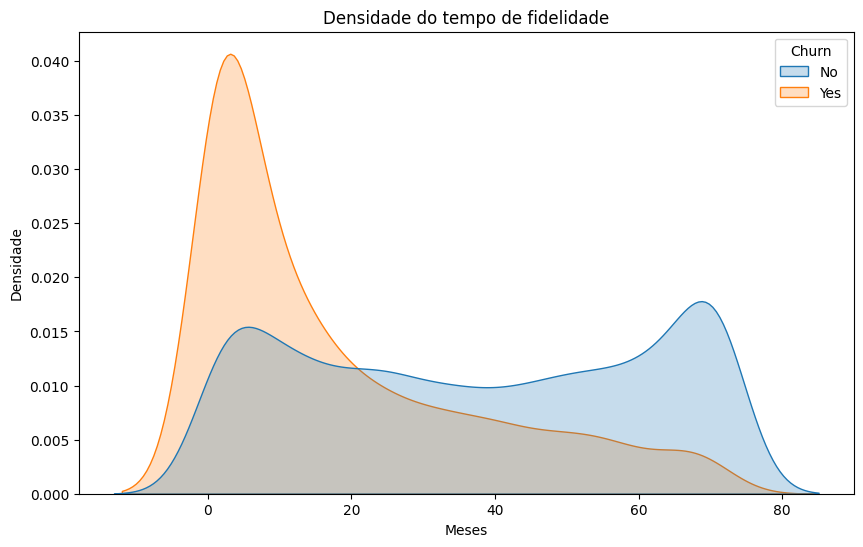

In [28]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, common_norm=False)

plt.title('Densidade do tempo de fidelidade')
plt.xlabel('Meses')
plt.ylabel('Densidade')
plt.show()

A visualização do histograma revela:
___

1. Clientes desistem nos primeiros meses de relacionamento com a empresa.

# 📄Relatorio Final

Os maiores achados na etapa de análise de dados foram:

1. Quem não possui dependentes, abandona com facilidade.
2. Quem possui serviço de telefonia, permanece por mais tempo.
3. Quem possui o serviço de fibra óptica, abandona com facilidade.
4. Quem não possui serviço de segurança online, abandona com facilidade.
5. Quem não possui serviço adicional de prioridades em chamados para suporte, abandona com facilidade.
6. Quem possui assinatura de contrato na modalidade mensal abandona com facilidade.
7. Quem efetua pagamento por meio de cheque eletrônico abandona com mais facilidade.
8. Clientes desistem nos primeiros meses de relacionamento com a empresa.
9. Clientes que pagam pouco no seu plano tendem a permanecer mais tempo.

10. Clientes com contas mais caras têm uma propensão muito maior a cancelar, o que pode indicar carência de benefícios percebidos.

11. O Ponto crítico de perdas de clientes é aproximadamente a partir de $70$ $R{$}$.

______________

# $$Sugestões$$

## Fortalecimento do Produto e Valor Agregado
1. **Fibra Óptica**: Se o cliente de fibra cancela mais, pode haver instabilidade técnica ou expectativa frustrada.

- Sugestão: Realizar uma auditoria de qualidade técnica na rede e enviar um guia de "Como otimizar seu Wi-Fi" logo após a instalação.

2. **Segurança e Suporte**: Estes serviços são retentores.

- Sugestão: Criar um pacote onde Segurança Online e Suporte Prioritário já venham inclusos nos planos de Fibra, em vez de serem vendidos separadamente. O cliente precisa sentir que está "protegido" por padrão.

## Estratégia de Preço e Fidelização
1. **Contratos Mensais**: O contrato mensal não cria barreira de saída.

- Sugestão: Oferecer descontos progressivos ou o primeiro mês grátis para quem migrar do plano mensal para o anual.

2. **Teto de R$ 70,00**: Este é o seu "ponto de dor".

- Sugestão: Para planos acima de R$ 70,00, é obrigatório incluir benefícios que "justifiquem" o gasto, como serviços de streaming parceiros, dobro de velocidade ou visitas técnicas gratuitas. O cliente deve sentir que o custo-benefício é imbatível.

## Melhoria na Experiência Inicial (Onboarding)
1. **Desistência nos primeiros meses**: O "efeito uau" está faltando.

- Sugestão: Implementar uma régua de comunicação nos primeiros 90 dias (boas-vindas, check-up de satisfação após 15 dias e um brinde/benefício no 3º mês).

2. **Dependentes**: Quem está sozinho cancela mais rápido porque o impacto do desligamento é menor.

- Sugestão: Criar incentivos para o titular adicionar membros da família (ex: e-mails educacionais sobre "Internet para toda a família" ou descontos em linhas adicionais de telefonia).

## Gestão Financeira e Pagamentos
1. **Cheque Eletrônico**: Métodos de pagamento manuais geram esquecimento e atrito.

- Sugestão: Oferecer um pequeno desconto (ex: R$ 5,00) ou bônus de dados para quem migrar para o Cartão de Crédito ou Débito Automático. Isso automatiza a retenção.